In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv('train_file.csv', index_col=0)

In [6]:
df.shape

(97908, 15)

In [11]:
df = df.drop('color', axis=1)

In [87]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,weekday,fare-bin,haversine,abs_lat_diff,abs_lon_diff
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,0,"(0.0, 5.0]",1.031896,0.009041,0.002701
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,1,"(15.0, 20.0]",8.459418,0.070701,0.036780
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,3,"(5.0, 10.0]",1.391052,0.010708,0.008504
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,5,"(5.0, 10.0]",2.802346,0.024949,0.004437
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,1,"(5.0, 10.0]",2.001353,0.015754,0.011440


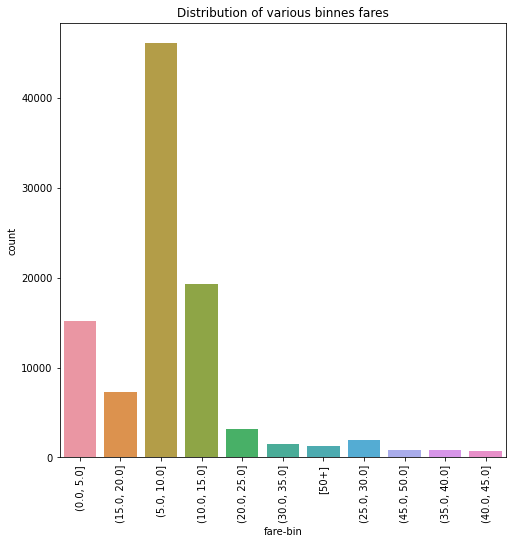

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(df['fare-bin'])
plt.xticks(rotation=90)
plt.title('Distribution of various binnes fares')
plt.show()

In [20]:
# For regression we won't be using the feature - 'fare-bin' since it is representative of the target value.
# We shall also minimise the chances of using highly correlated features as they might bring interpretability issues in the model.

In [21]:
# Absolute difference in latitude and longitude
df['abs_lat_diff'] = (df['dropoff_latitude'] - df['pickup_latitude']).abs()
df['abs_lon_diff'] = (df['dropoff_longitude'] - df['pickup_longitude']).abs()

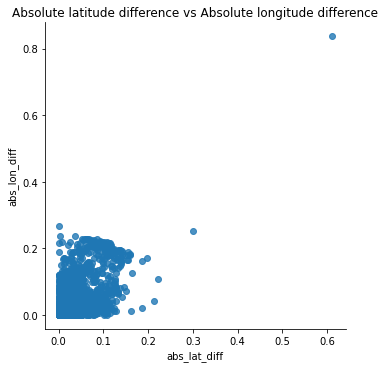

In [23]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', fit_reg = False,
           data = df.sample(10000, random_state=10));
plt.title('Absolute latitude difference vs Absolute longitude difference');

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


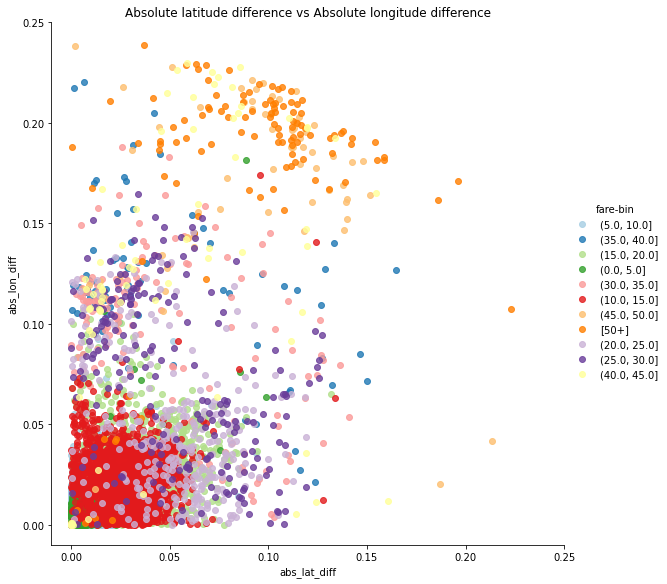

In [28]:
palette = sns.color_palette('Paired', 11)
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8, palette = palette,
           fit_reg = False, data = df.sample(10000, random_state=10));

plt.xlim((-0.01, .25)); plt.ylim((-0.01, .25))
plt.title('Absolute latitude difference vs Absolute longitude difference');

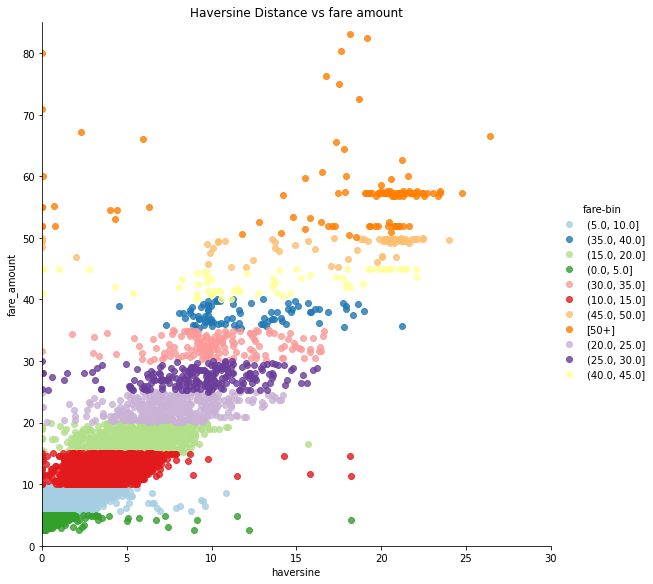

In [36]:
palette = sns.color_palette('Paired', 11)
sns.lmplot('haversine', 'fare_amount', hue = 'fare-bin', height = 8, palette = palette,
           fit_reg = False, data = df.sample(10000, random_state=10));

plt.xlim((-0.01,30 )); plt.ylim((-0.01, 85))
plt.title('Haversine Distance vs fare amount');

In [37]:
# From the above graph it is clear that we have a linear relationship between 'Fare' and 'Haversine distance'
# Using the features gathered so far we shall first with a simple regression model without any pre-processing

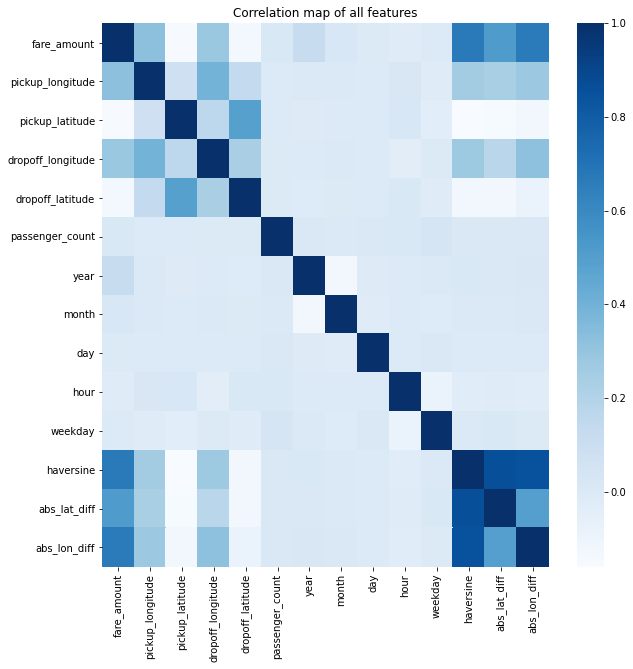

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='Blues')
plt.title('Correlation map of all features')
plt.show()

In [ ]:
# We shall use 'haversine', 'abs_lon_diff', 'abs_lat_diff', 

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df, np.array(df['fare_amount']), 
                                                      stratify = df['fare-bin'], 
                                                      random_state = 10)

In [43]:
lr = LinearRegression()

lr.fit(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff']], y_train)
print('Training Done')
print('Co-efficients are: ')
print('abs_lat_diff coef: ', round(lr.coef_[1], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[2], 4),
      '\thaversine:', round(lr.coef_[0], 4))

y_pred = lr.predict(X_test[['haversine', 'abs_lat_diff', 'abs_lon_diff']])

Training Done
Co-efficients are: 
abs_lat_diff coef:  155.1727 	abs_lon_diff coef: 168.7955 	haversine: -0.7827


In [45]:
def scorer(y_true, y_pred, p):
  print('Root-Mean-Squared Error is: ', np.sqrt(mean_squared_error(y_true, y_pred)))
  print('Mean Absolute Error is: ', (mean_absolute_error(y_true, y_pred)))
  R2 = r2_score(y_true, y_pred)
  print('R2 error is : ', R2)
  adj_r2 = (1 - (1-R2)*(len(y_true)-1)/(len(y_true)-p-1))
  print('Adjusted R2 score is: ', adj_r2)

In [46]:
scorer(y_test, y_pred, 3)

Root-Mean-Squared Error is:  6.533490486582889
Mean Absolute Error is:  3.4413352969862743
R2 error is :  0.5404841865864886
Adjusted R2 score is:  0.5404278572668204


In [ ]:
# 1-(1-R2)*(n-1)/(n-p-1)

In [73]:
# Now let us scale the data so that all some irrelevant features don't get high weights
# I will use the Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff']])
X_train_scaled = scaler.transform(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff']])
X_test_scaled = scaler.transform(X_test[['haversine', 'abs_lat_diff', 'abs_lon_diff']])
print('Scaling Done..')

Scaling Done..


In [74]:
X_train_scaled

array([[ 2.45334019,  3.36627896,  1.16797957],
       [-0.32118302, -0.20822392, -0.32821601],
       [-0.40926548, -0.28522606, -0.49098621],
       ...,
       [ 0.26684632,  0.55903542, -0.0311982 ],
       [-0.34518699, -0.25942394, -0.30458503],
       [-0.34606765, -0.66622836, -0.05683782]])

In [75]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
print('Training Done')
print('Co-efficients are: ')
print('abs_lat_diff coef: ', round(lr.coef_[1], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[2], 4),
      '\thaversine:', round(lr.coef_[0], 4))

y_pred = lr.predict(X_test_scaled)

Training Done
Co-efficients are: 
abs_lat_diff coef:  4.6067 	abs_lon_diff coef: 7.143 	haversine: -3.6576


In [76]:
scorer(y_test, y_pred, 3)

Root-Mean-Squared Error is:  6.533490486582892
Mean Absolute Error is:  3.4413352969862836
R2 error is :  0.5404841865864881
Adjusted R2 score is:  0.54042785726682


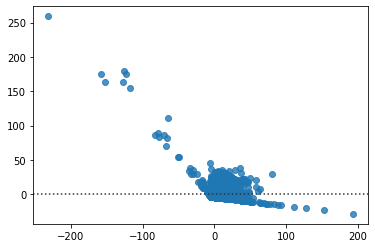

In [77]:
# Finding the residuals

residuals = y_test - y_pred
sns.residplot(residuals, y_pred)

From this residual plot we can understand that there is some non-linearity in the data, to deal with this we shall make some non-linear transformation of our dataset.

In [ ]:
X_train['haversine_sq'] = np.power(X_train['haversine'], 2)
X_test['haversine_sq'] = np.power(X_test['haversine'], 2)

scaler.fit(X_train[['haversine_sq', 'abs_lat_diff', 'abs_lon_diff']])
X_train_scaled = scaler.transform(X_train[['haversine_sq', 'abs_lat_diff', 'abs_lon_diff']])
X_test_scaled = scaler.transform(X_test[['haversine_sq', 'abs_lat_diff', 'abs_lon_diff']])
print('Scaling Done..')

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
print('Training Done')
print('Co-efficients are: ')
print('abs_lat_diff coef: ', round(lr.coef_[1], 4), 
      '\t abs_lon_diff coef:', round(lr.coef_[2], 4),
      '\t haversine_sq:', round(lr.coef_[0], 4))

y_pred = lr.predict(X_test_scaled)

In [89]:
scorer(y_test, y_pred, 3)

Root-Mean-Squared Error is:  5.726183424329329
Mean Absolute Error is:  2.7658465904957708
R2 error is :  0.6470278451405737
Adjusted R2 score is:  0.6469845763764426


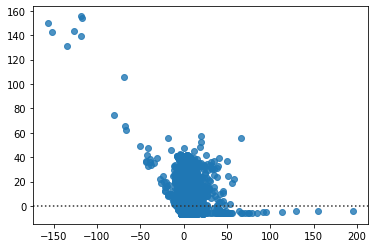

In [90]:
residuals = y_test - y_pred
sns.residplot(residuals, y_pred)

We see that after including the polynomial term our error decreased and the variance explained (R2 score) by the model also increased significantly. 
This model has high interpretability and can be understood easily

### We shall now use all the features of our dataset and see whether we are able to improve our predictions or not.

## 1. Simple Multinomial Regression model without penalty

In [92]:
# Now lets include all features and see if there is any significant change in the performance
X_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'weekday', 'fare-bin', 'haversine',
       'abs_lat_diff', 'abs_lon_diff', 'haversine_sq', 'haversine_log',
       'haversine_cb'],
      dtype='object')

In [93]:
features = ['passenger_count', 'year', 'day',
       'month', 'hour', 'weekday', 'haversine_sq',
       'abs_lat_diff', 'abs_lon_diff']

scaler = StandardScaler()
scaler.fit(X_train[features])
X_train_scaled = scaler.transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])
print('Scaling Done..')

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
print('Training Done')
# print('Co-efficients are: ')
# print('abs_lat_diff coef: ', round(lr.coef_[1], 4), 
#       '\tabs_lon_diff coef:', round(lr.coef_[2], 4),
#       '\thaversine:', round(lr.coef_[0], 4))
y_pred = lr.predict(X_test_scaled)

scorer(y_test, y_pred, len(features))

Scaling Done..
Training Done
Root-Mean-Squared Error is:  5.636147927397901
Mean Absolute Error is:  2.664536715997592
R2 error is :  0.6580404777587159
Adjusted R2 score is:  0.657914690547363


In [94]:
print(lr.intercept_)

11.348709809208588


In [95]:
print(lr.coef_)

[ 0.05455282  1.01297269 -0.01746235  0.26506463  0.05432422 -0.07832237
 -4.90538391  3.77394427  7.1143821 ]


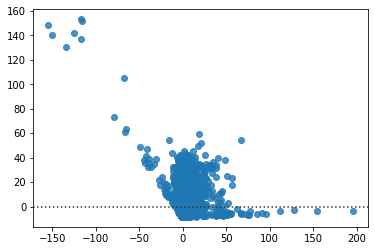

In [96]:
# Finding the residuals

residuals = y_test - y_pred
sns.residplot(residuals, y_pred)

## 2. Ridge Regression (L2 penalty)

In [97]:
from sklearn.linear_model import Ridge, Lasso

In [109]:
features = ['passenger_count', 'year', 'day','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',
       'month', 'hour', 'weekday', 'haversine_sq', 'haversine',
       'abs_lat_diff', 'abs_lon_diff']

scaler = StandardScaler()
scaler.fit(X_train[features])
X_train_scaled = scaler.transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])
print('Scaling Done..')

ridge = Ridge()

ridge.fit(X_train_scaled, y_train)
print('Training Done')
# print('Co-efficients are: ')
# print('abs_lat_diff coef: ', round(ridge.coef_[1], 4), 
#       '\tabs_lon_diff coef:', round(ridge.coef_[2], 4),
#       '\thaversine:', round(ridge.coef_[0], 4))
y_pred = ridge.predict(X_test_scaled)

scorer(y_test, y_pred, len(features))

Scaling Done..
Training Done
Root-Mean-Squared Error is:  5.468252707144676
Mean Absolute Error is:  2.4806481040414283
R2 error is :  0.6781102937233496
Adjusted R2 score is:  0.6779260710151543


In [107]:
ridge.coef_

array([ 0.05846674,  1.00515735, -0.01671755,  0.61984466, -0.33194174,
        0.26632348, -0.61240696,  0.26094967,  0.05766603, -0.08328764,
       -4.70515567,  3.5489449 ,  6.78275363])

Feature: 0, Score: 0.05568
Feature: 1, Score: 1.00798
Feature: 2, Score: -0.01493
Feature: 3, Score: 1.09680
Feature: 4, Score: -0.42607
Feature: 5, Score: 0.05638
Feature: 6, Score: -0.50928
Feature: 7, Score: 0.26623
Feature: 8, Score: 0.05336
Feature: 9, Score: -0.06738
Feature: 10, Score: -5.41919
Feature: 11, Score: 10.78028
Feature: 12, Score: -2.44070
Feature: 13, Score: 0.82188


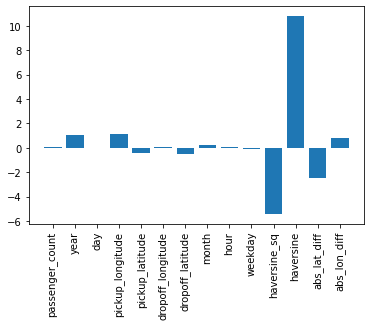

In [110]:
# get importance
importance = ridge.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in features], importance)
plt.xticks(rotation=90)
plt.show()

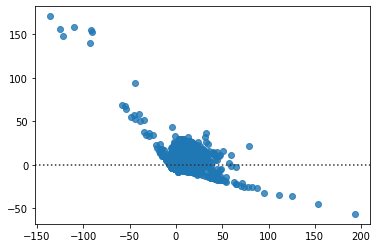

In [104]:
# Finding the residuals

residuals = y_test - y_pred
sns.residplot(residuals, y_pred)

This plot for residuals seems much better than the other plots we have made for the other models.

In [103]:
features = ['passenger_count', 'year', 'day','pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude',
       'month', 'hour', 'weekday', 'haversine_sq',
       'abs_lat_diff', 'abs_lon_diff']

scaler = StandardScaler()
scaler.fit(X_train[features])
X_train_scaled = scaler.transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])
print('Scaling Done..')

lasso = Lasso()

lasso.fit(X_train_scaled, y_train)
print('Training Done')
# print('Co-efficients are: ')
# print('abs_lat_diff coef: ', round(lasso.coef_[1], 4), 
#       '\tabs_lon_diff coef:', round(lasso.coef_[2], 4),
#       '\thaversine:', round(lasso.coef_[0], 4))
y_pred = lasso.predict(X_test_scaled)

scorer(y_test, y_pred, len(features))

Scaling Done..
Training Done
Root-Mean-Squared Error is:  6.171902640788795
Mean Absolute Error is:  3.4022716563722453
R2 error is :  0.5899393756734501
Adjusted R2 score is:  0.5897214633930166


### So after the results of the different models we shall go with the Ridge regression model

##### To conduct further statistical tests for checking the validity of our regression we can't rely on the sklearn package, rather for proving statistical signifucance of our assumptions we shall be using the 'statsmodel' library from scipy

In [111]:
import statsmodels.formula.api as sm

In [118]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour', 'weekday', 'fare-bin', 'haversine',
       'abs_lat_diff', 'abs_lon_diff', 'haversine_sq'],
      dtype='object')

In [113]:
df['haversine_sq'] = np.power(df['haversine'], 2)

In [130]:
data = df[['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'hour', 'weekday', 'haversine', 'haversine_sq',
       'abs_lat_diff', 'abs_lon_diff']]

In [131]:
formula_str = data.columns[0]+' ~ '+'+'.join(data.columns[1:])
formula_str

'fare_amount ~ pickup_longitude+pickup_latitude+dropoff_longitude+dropoff_latitude+passenger_count+year+month+hour+weekday+haversine+haversine_sq+abs_lat_diff+abs_lon_diff'

## Fitting the model

In [122]:
model=sm.ols(formula=formula_str, data=data)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 1.581e+04
Date:                Sat, 26 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:04:09   Log-Likelihood:            -3.0588e+05
No. Observations:               97908   AIC:                         6.118e+05
Df Residuals:                   97894   BIC:                         6.119e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1649.7946     58.17

We shall now create a new dataframe consisting of the p-values and the statistical significance of the features

In [125]:
df_result = pd.DataFrame()
df_result['pvalues']=fitted.pvalues[1:]
df_result['Features']=data.columns[1:]
df_result.set_index('Features',inplace=True)

In [126]:
def yes_no(b):
    if b:
        return 'Yes'
    else:
        return 'No'

df_result['Statistically significant?']= df_result['pvalues'].apply(yes_no)
df_result

,pvalues,Statistically significant?
Features,,
pickup_longitude,0.000000e+00,No
pickup_latitude,4.770239e-60,Yes
dropoff_longitude,1.213406e-01,Yes
dropoff_latitude,1.946509e-134,Yes
passenger_count,5.137021e-04,Yes
year,0.000000e+00,No
month,4.381500e-54,Yes
hour,2.465895e-02,Yes
weekday,4.044671e-03,Yes


### Fitted vs Residuals

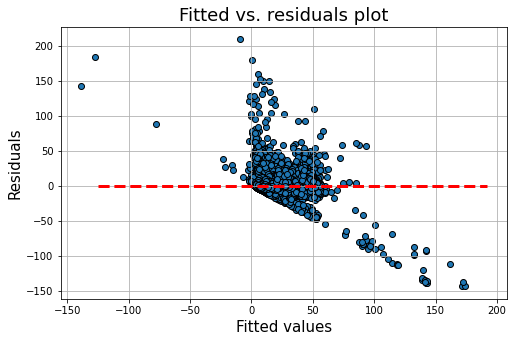

In [132]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

### Histogram of normalized residuals

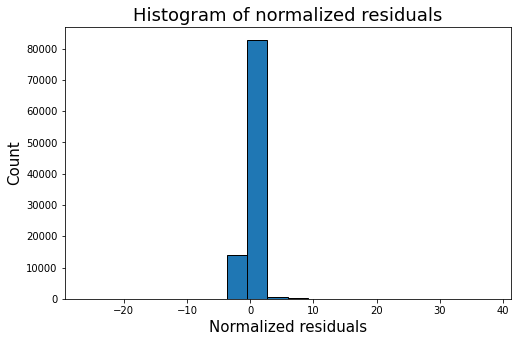

In [133]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

## QQ Plots of the residuals

In [134]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

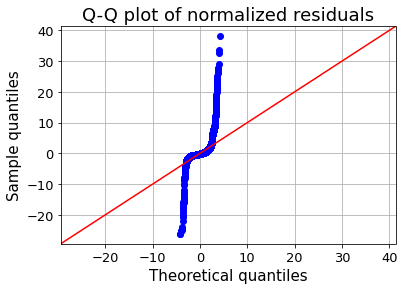

In [135]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [136]:
from scipy.stats import shapiro
_,p=shapiro(fitted.resid)


if p<0.01:
    print("The residuals seem to come from Gaussian process")
else:
    print("The normality assumption may not hold")

The residuals seem to come from Gaussian process


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Variance Inflation Factor (VIF)

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [138]:
for i in range(len(data.columns[1:])):
    v=vif(np.matrix(data[1:]),i)
    print("Variance inflation factor for {}: {}".format(df.columns[i],round(v,2)))

Variance inflation factor for fare_amount: 7.29
Variance inflation factor for pickup_longitude: 3033483.16
Variance inflation factor for pickup_latitude: 1564290.39
Variance inflation factor for dropoff_longitude: 3104043.81
Variance inflation factor for dropoff_latitude: 1456050.81
Variance inflation factor for passenger_count: 2.66
Variance inflation factor for year: 1100867.86
Variance inflation factor for month: 4.36
Variance inflation factor for day: 5.37
Variance inflation factor for hour: 3.46
Variance inflation factor for weekday: 102.23
Variance inflation factor for fare-bin: 2.69
Variance inflation factor for haversine: 33.19
